# Analyze the problem



จากโจทย์ที่ได้รับมา ซึ่งจากการวิเคราะห์ดูแล้วเข้าใจว่า ตัวโจทย์จะเป็นการพยายามหาค่าพารามิเตอร์ของแบบจำลองจากชุดข้อมูลที่สังเกตได้เหล่านี้ โดยเริ่มต้นขั้นแรก ผมจะแบ่งข้อมูลออกเป็นสองส่วน ดังนี้
<br>
<br>

1. ข้อมูลที่มีแพทเทิร์น หรือคล้ายๆ ว่าจะมีรูปแบบบางอย่างที่สามารถใช้แบบจำลองทำนายได้ หรือพูดอีกแบบคือ ข้อมูลสามารถอธิบายการกระจายตัวได้ ด้วยชุดของพารามิเตอร์บางแบบ ส่วนนี้เราจะเรียกว่า inliers

2. ข้อมูลที่เป็นแบบสุ่มหรือเป็นข้อมูลที่มีรูปแบบไม่แน่นอน หรือค่าที่ผิดปกติ เราจะเรียกสิ่งนี้ว่า outliers
<br>

สิ่งที่เราต้องการก็คือ การหาข้อมูลที่สามารถอธิบายการกระจายตัวได้ด้วยชุดพารามิเตอร์โมเดลบางชุด แม้ว่าอาจมีสัญญาณรบกวน และ "outliers" ซึ่งหลังจากตีโจทย์และพอมองภาพออกแล้ว ผมก็ได้เริ่มศึกษาว่า มีเทคนิคหรือวิธีการใหนบ้างที่พอจะช่วยเราทำสิ่งนี้ได้ หลังจากพยายาม research อยู่สักพักผมก็ได้อ่าน paper นึงที่พอจะทำให้มองภาพรวมวิธีแก้ปัญหานี้ได้อย่างค่อนข้างครอบคลุม นั่นก็คือ paper นี้  

" A survey of feature matching methods "
(https://ietresearch.onlinelibrary.wiley.com/doi/full/10.1049/ipr2.13032)

ซึ่งเป็น paper แบบ survey ทำให้มองเห็น algorithm ต่างๆที่น่าสนใจ ซึ่งในตัว paper นี้ จะพูดถึงโจทย์ทางเทคนิคที่จะนำมาแก้ปัญหา การจับคู่รูปภาพที่เหมือนกันจากมุมมองที่แตกต่างกัน โดยจะยังรักษาความสอดคล้องกันเอาไว้ แม้อาจดูเหมือนไม่เกี่ยวกับโจทย์แต่มันก็มีหัวข้อนึงใน paper ที่ผมศึกษาแล้วพบว่านำมาใช้กับโจทย์นี้ได้ คือหัวข้อของ  " Mismatch removal " โดยเบสตาม paper นี้เขาจะแบ่งวิธีแก้โจทย์นี้เป็นสองข้อคือ
1. Manual methods
2. Deep learning-based methods

ซึ่งแต่ละหัวข้อเองก็มีหลากหลาย algorithm ผมจึงได้เลือกมา 2 algorithm เพื่อมาทำการทดลองกับโจทย์นี้ โดยเทคนิคที่ผมเลือกมาคือ

1. RANSAC (random sample consensus)
 เหตุผลที่เลือก algorithm นี้มาเพราะเป็นเทคนิคเก่า และน่าสนใจ เลยอยากทดลองดูว่าจะให้ผลลัพธ์กับโจทย์นี้ได้ไหม
2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
เหตุผลที่เลือก algorithm นี้มาเพราะ DBSCAN เป็น algorithm หนึ่งในการทำ clustering ที่สามารถทำได้โดยไม่ต้องกำหนดจำนวน cluster ที่ต้องการแบ่งเหมือนกับ K-means ดังนั้นตัว DBSCAN ตัวนี้จึงเหมาะสำหรับข้อมูลที่กระจายตัวกันแบบไม่เป็นกลุ่มก้อน แต่ก็ยังคงมี pattern บางอย่างหรือเป็นรูปทรงต่างๆ ที่ k-means ไม่สามารถจัดกลุ่มได้  และยังรวมไปถึงเป็น algorithm ที่เหมาะกับการตัด Noise หรือ Outliner ออกไปอีกด้วย


<br>
🤭


# Dowload All Data

In [144]:
file_paths = ['/content/L8_test_data3.txt', '/content/L8_test_data1.txt', '/content/L8_test_data2.txt']

def read_file(file_path):
  X = []
  Y = []

  with open(file_path, 'r') as file:
      XY_list = file.readlines()

  for i in XY_list:
      X.append(float(i.split(' ')[0]))
      Y.append(float(i.split(' ')[1]))
  return X, Y

X, Y = read_file(file_paths[0])
print(X)
print(Y)

[12.669279381393325, 15.227671495095878, 15.163704280806444, 14.930165399070141, 7.179299548433294, 15.233861749310636, 15.291178131058718, 14.983542131768926, 15.300202168961823, 14.763410930981825, 16.315094829972118, 14.243217053530602, 15.306212798736755, 14.80814540727855, 14.483696567668078, 1.1922385851836648, 14.34869885119191, 15.001470519818943, 14.62422987668609, 14.808124507970065, 15.254979742663856, 19.565965851987073, 19.413977132064993, 14.668260663305666, 15.019659510025472, 14.833532317079124, 14.598848786690883, 14.31873660389485, 14.501047740585685, 14.49092729524042, 14.2306894129934, 14.0522465804531, 14.310491159483114, 1.3129618116133557, 14.097379097749338, 13.736886415087676, 14.348875602292205, 14.14127416712739, 13.010347688511594, 13.887366458456647, 13.842444231569441, 13.867615510132442, 14.018078636387662, 14.072929540646268, 14.316083290137767, 13.777821910581654, 12.650040683570836, 2.145107124594172, 7.744086193091533, 14.413563517217387, 12.962903966

# Plot All Data

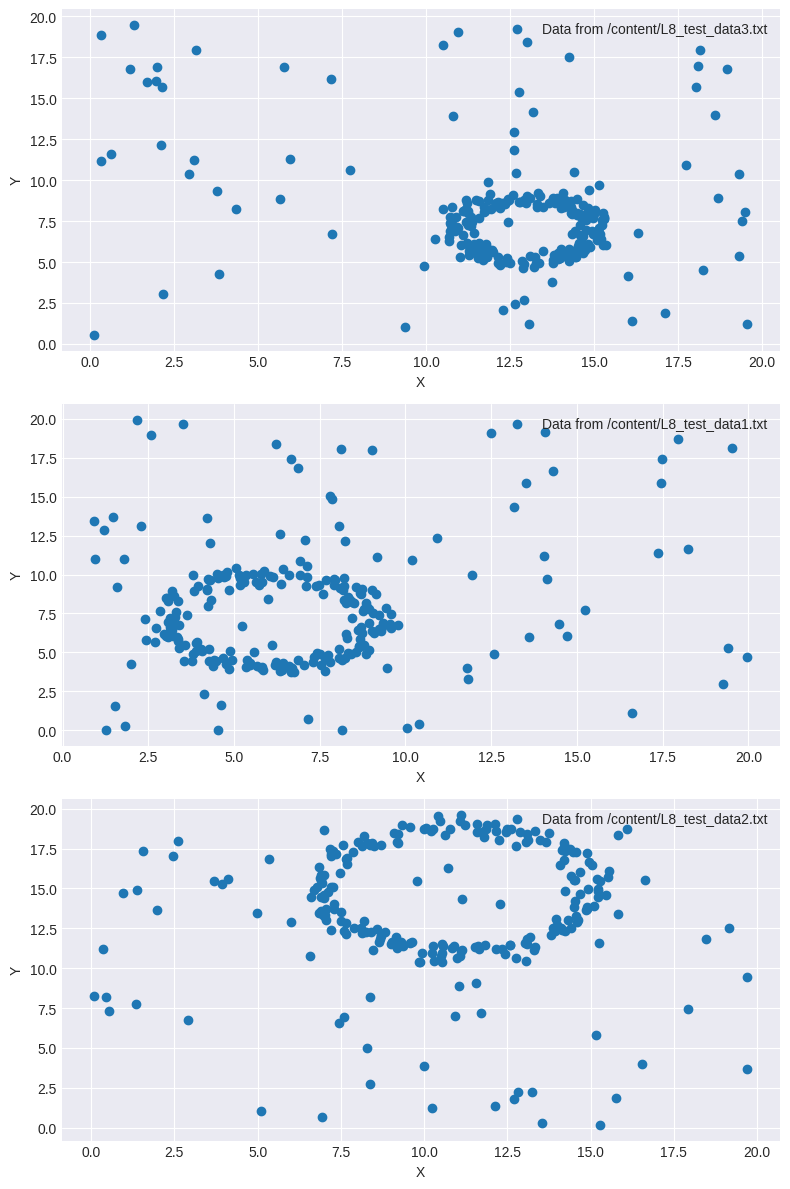

In [148]:
import matplotlib.pyplot as plt
import numpy as np

file_paths = ['/content/L8_test_data3.txt', '/content/L8_test_data1.txt', '/content/L8_test_data2.txt']

# Create 3 subplots arranged in 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(8, 12))  # 3 rows, 1 column, and custom figure size

# Iterate over your file paths and plot data on each subplot
for idx, file_path in enumerate(file_paths):
    X, Y = read_file(file_path)
    axs[idx].scatter(X, Y, label=f'Data from {file_path}')
    axs[idx].set_xlabel('X')
    axs[idx].set_ylabel('Y')
    axs[idx].legend()

    axs[idx].legend(loc='upper right')


# Adjust the layout so that subplots do not overlap
plt.tight_layout()

# Show the figure with all subplots
plt.show()


# RANSAC (random sample consensus)



Original Paper : https://dl.acm.org/doi/pdf/10.1145/358669.358692
<br><br>


**RANSAC (Random Sample Consensus)** เป็นอัลกอริธึมที่มีประสิทธิภาพซึ่งใช้กันมากใน computer vision ในการประมาณค่าพารามิเตอร์ของโมเดลเมื่อมีค่าผิดปกติ ซึ่งจะมีประโยชน์ค่อนข้างมากเมื่อมีข้อมูลที่มีสัญญาณรบกวนจำนวนมาก และเป้าหมายของ algorithm นี้คือการหาแบบจำลองที่เหมาะกับ inliers ที่สุด
<br><br>**RANSAC**
เป็นอัลกอริธึมแบบวนซ้ำซึ่งจะสุ่มตัวอย่างชุดย่อยของข้อมูลและปรับแบบจำลองให้เหมาะกับชุดย่อยนั้น จากนั้นแบบจำลองจะใช้ในการจำแนกข้อมูลที่เหลือเป็นค่า inliers หรือ outliers และอัลกอริธึมก็จะยังคงวนซ้ำ โดยเลือกชุดย่อยแบบสุ่มใหม่จากข้อมูล จนกว่าจะพบแบบจำลองที่เหมาะสม
<br><br>
สมมติว่าเรามีชุดของจุดข้อมูล X = {x1, x2, …, xn} และเราต้องการประมาณแบบจำลอง M ที่เหมาะกับข้อมูลนี้มากที่สุด โมเดลสามารถแสดงได้ด้วยชุดพารามิเตอร์ θ = {θ1, θ2, …, θn}
<br><br>
**ในการใช้ RANSAC เราจำเป็นต้องกำหนดพารามิเตอร์ต่อไปนี้:**

**fit_func:** จำนวนจุดข้อมูลขั้นต่ำที่จำเป็นในการประมาณค่าพารามิเตอร์โมเดล
<br>
**max_iterations:** จำนวนการวนซ้ำที่อัลกอริทึมควรรัน
<br>
**inlier_func:** เกณฑ์ที่กำหนดว่าจุดข้อมูลใดที่ถือว่าเป็น inliers
<br>
**inlier_threshold:** จำนวน inliers ขั้นต่ำที่ต้องใช้ในการยอมรับแบบจำลองว่าถูกต้อง
<br><br>
**อัลกอริทึมทำงานดังนี้:**

1. สุ่มเลือกจุดข้อมูล n จุดจาก Data และใช้เพื่อประมาณค่าพารามิเตอร์โมเดล θ (fit_func)
<br>
2. จำแนกจุดข้อมูลที่เหลือเป็น inliers หรือ outliers โดยพิจารณาว่าระยะห่างจากจุดเหล่านั้นไปยังแบบจำลองนั้นน้อยกว่าเกณฑ์ (inlier_func) หรือไม่
<br>
3. หากจำนวนของ inliers มากกว่าหรือเท่ากับ inlier_threshold ให้ประมาณค่าพารามิเตอร์โมเดลอีกครั้งโดยใช้ inliers ทั้งหมดและยุติอัลกอริทึม
<br>
4. ทำซ้ำขั้นตอนที่ 1–3 จำนวน max_iterations ครั้ง และเลือกรุ่นที่มีจำนวน inliers มากที่สุด

<br>


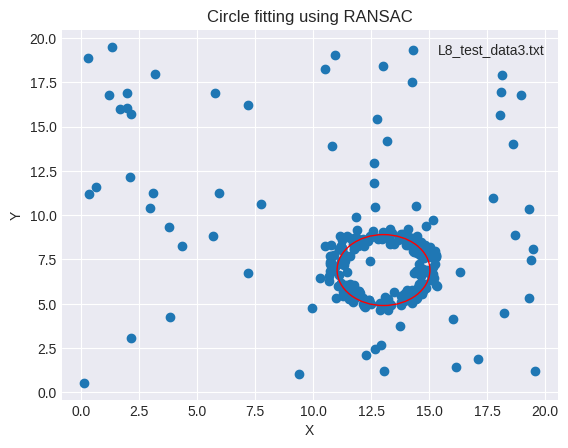

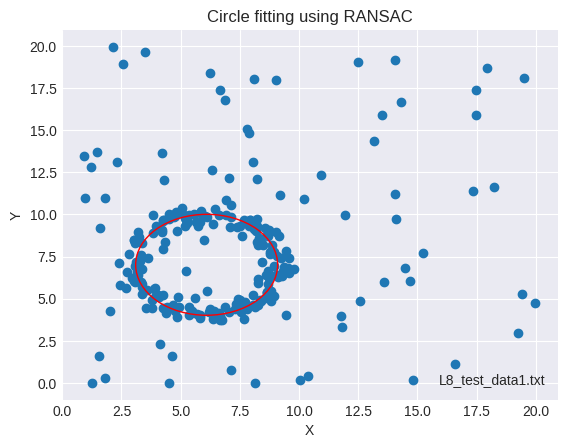

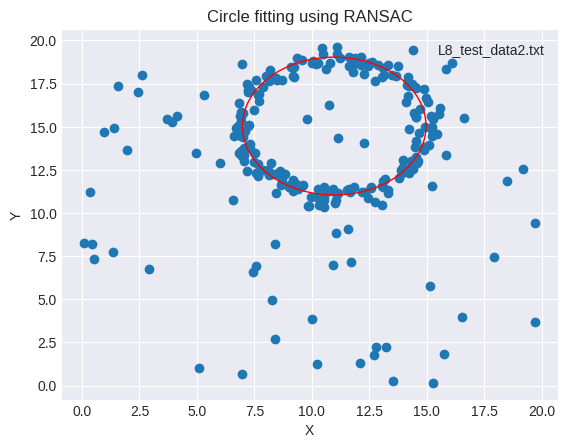

In [110]:
import numpy as np
import matplotlib.pyplot as plt

def fit_circle_to_points(pts):
    # Solve the system of equations to find the circle center and radius
    # It solves the system of equations derived from the circle equation (x-h)^2 + (y-k)^2 = r^2

    A = np.array([
        [2 * (pts[1][0] - pts[0][0]), 2 * (pts[1][1] - pts[0][1])],
        [2 * (pts[2][0] - pts[1][0]), 2 * (pts[2][1] - pts[1][1])]
    ])
    b = np.array([
        pts[1][0]**2 - pts[0][0]**2 + pts[1][1]**2 - pts[0][1]**2,
        pts[2][0]**2 - pts[1][0]**2 + pts[2][1]**2 - pts[1][1]**2
    ])

    # Solve linear equations
    center = np.linalg.solve(A, b)
    radius = np.sqrt((pts[0][0] - center[0])**2 + (pts[0][1] - center[1])**2)
    return center[0], center[1], radius

def is_inlier_circle(center, radius, xy, threshold):
    # This function determines if a point (xy) lies within a specified distance (threshold)
    # from a circle defined by its center and radius. This is used to identify inliers.
    distance = np.sqrt((xy[0] - center[0])**2 + (xy[1] - center[1])**2)
    return np.abs(distance - radius) < threshold

def run_ransac(data, fit_func, inlier_func, max_iterations, inlier_threshold):
    best_inliers_count = 0
    best_circle = None

    for _ in range(max_iterations):

        # Randomly select 3 points and fit a circle to these (1)
        sample_indices = np.random.choice(data.shape[0], 3, replace=False)
        sample_points = data[sample_indices]
        try:
            center_x, center_y, radius = fit_func(sample_points)

            # Measure is inliers or not (2)
            inliers_count = 0
            for point in data:
                if inlier_func((center_x, center_y), radius, point, inlier_threshold):
                    inliers_count += 1

            # Check if we have the best model so far (3)
            if inliers_count > best_inliers_count:
                best_inliers_count = inliers_count
                best_circle = (center_x, center_y, radius)
        except np.linalg.LinAlgError:
            # Catch and ignore errors arising from singular matrix solutions, which occur
            # when the selected points are collinear and hence can't define a circle.
            continue
    return best_circle

for idx, file_path in enumerate(file_paths):
  X, Y = read_file(file_path)

  # Dataset
  X = np.array(X)
  Y = np.array(Y)

  # Stack X and Y into a single array
  data = np.vstack((X, Y)).T

  max_iterations = 1000
  inlier_threshold = 0.5  # Adjust this threshold as needed

  best_circle = run_ransac(data, fit_circle_to_points, is_inlier_circle, max_iterations, inlier_threshold)

  # Plotting data points and fitted circle

  fig, ax = plt.subplots()
  ax.scatter(X, Y, label=file_path.split('/')[-1]) # Plot the original data points

  if best_circle is not None:
    # If a circle model was found, plot it
      circle = plt.Circle(best_circle[:2], best_circle[2], color='r', fill=False)
      ax.add_artist(circle)
      plt.title('Circle fitting using RANSAC')
  else:
    # If no model was found, update the title accordingly
      plt.title('No circle model found')


  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()
  plt.show()

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Original Paper : https://arxiv.org/ftp/arxiv/papers/1809/1809.06189.pdf
<br><br>
โดยทั่วไปแล้วในโจทย์ทางด้าน clustering ก็มี algorithm อย่าง K-Means อยู่ แต่มันก็มีข้อเสียตรงที่ว่า เราจะไม่ได้แบ่งกลุ่มตามที่เราต้องการ และเราจำเป็นต้องกำหนดค่า k ด้วยตัวเอง (จำนวน cluster ที่ต้องการจะแบ่ง) ซึ่งในกรณีของโจทย์นี้ ใน dataset ที่มีข้อมูลที่ไม่รวมกันเป็นกลุ่มก้อน, มี pattern เป็นรูปทรงต่างๆ หรือมี outliner มาก การเลือก  algorithm DBSCAN มาแก้ปัญหานี้จึงเหมาะกว่า
<br><br>

**DBSCAN (Density-based spatial clustering of applications with noise)** เป็นการหาบริเวณที่ข้อมูลเกาะกลุ่มกัน ซึ่งสามารถคำนวณได้จาก data point ที่อยู่รอบๆ ในรัศมีที่กำหนด

การที่จะใช้ DBSCAN ได้ จำเป็นต้องมี 2 parameter คือ
1. **eps:** รัศมีจากจุดศูนย์กลาง
2. **min_samples:** จำนวน data point ขั้นต่ำสำหรับการกำหนด center
<br>

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*u9X9tJEj3XVbBwAaI_w4cQ.jpeg" alt="Example Image">
<br>
1. ตำแหน่ง x จะเรียกว่า Core point เพราะในรัศมีจาก x นั้น มี Neighbor point อย่างน้อย 6 จุด
<br>
<br>

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*J4zdWB1dZYnoK3s-sFvMxw.jpeg" alt="Example Image">
<br><br>
1. ตำแหน่ง x จะเรียกว่า Core point เพราะ มี Neighbor point อย่างน้อย 6
<br>
2. ตำแหน่ง y จะเรียกว่า Border เพราะ y มี Neighbor point ไม่ถึง 6 แต่อยู่ในรัศมีของ core point x
<br>
3. ตำแหน่ง z จะเรียกว่า Border เพราะ z มี Neighbor point ไม่ถึง 6 แต่อยู่ในรัศมีของ y ซึ่ง y ก็อยู่ในรัศมีของ Core point x ทำให้ z ถือว่าอยู่ใน cluster เดียวกันกับ x และ y
<br>
4. ตำแหน่ง n จะเรียกว่า Noise หรือ Outlier เพราะจุดนั้นไม่ได้อยู่ในรัศมีของ Core point ใดๆเลย​ ซึ่ง Noise นั้นจะเป็นข้อมูลที่เราต้องการตัดออกไป และไม่รวมอยู่ใน Cluster
<br><br>

**Algorithm ของ DBSCAN**
<br>
1. ในแต่ละ data point จะคำนวณหา neighbor point ทั้งหมดในรัศมี eps ถ้า data point ไหนมี neighbor point มากกว่าหรือเท่ากับ min_samples ให้ data point นั้นเป็น core point และสร้างเป็น cluster ใหม่
<br>
2. ในแต่ละ core point ถ้ามี neighbor ที่เชื่อมต่อกับอีก core point ได้ ให้รวมเป็น cluster เดียวกัน
<br>
3. ถ้า data point ไหนไม่เชื่อมต่อกับ core point ก็จะให้ data point นั้นเป็น Noise ซึ่งจะไม่อยู่ใน cluster ใดๆเลย

In [79]:
!pip install numpy scipy matplotlib scikit-learn

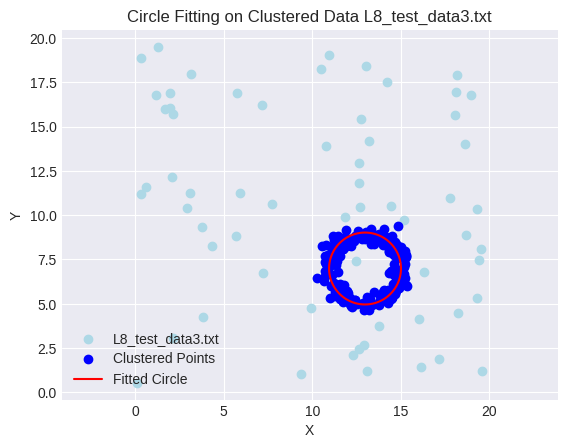

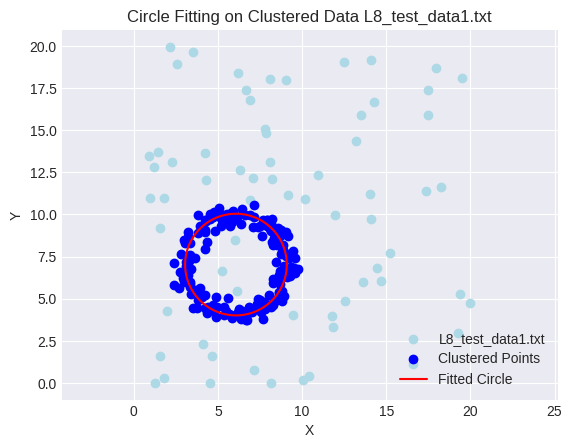

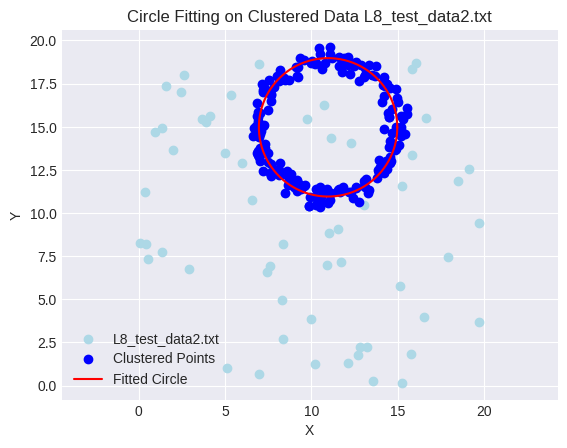

In [149]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares


for idx, file_path in enumerate(file_paths):

  X, Y = read_file(file_path)

  # Dataset
  X = np.array(X)
  Y = np.array(Y)

  # Stack X and Y into a single array for DBSCAN
  data = np.vstack((X, Y)).T

  # Apply DBSCAN to the data
  db = DBSCAN(eps=0.7, min_samples=4).fit(data)
  labels = db.labels_

  # Extract points in the largest cluster
  largest_cluster_label = max(set(labels), key=list(labels).count)
  cluster_points = data[labels == largest_cluster_label]

  # Define the circle function
  def circle(params, x, y):
      h, k, r = params
      return (x - h)**2 + (y - k)**2 - r**2

  # Define the cost function for least-squares optimization
  def cost_function(params, x, y):
      return circle(params, x, y)

  # Initial guess for parameters h, k, and r
  initial_guess = [np.mean(cluster_points[:, 0]), np.mean(cluster_points[:, 1]), 1]

  # Least squares optimization
  res = least_squares(cost_function, initial_guess, args=(cluster_points[:, 0], cluster_points[:, 1]))

  # Circle parameters
  h, k, r = res.x

  # Plotting the original data points
  plt.scatter(X, Y, label=file_path.split('/')[-1], color='lightblue')

  # Plot the clustered points
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color='blue', label='Clustered Points')

  # Plot the circle curve
  theta = np.linspace(0, 2 * np.pi, 100)
  x_circle = h + r * np.cos(theta)
  y_circle = k + r * np.sin(theta)
  plt.plot(x_circle, y_circle, color='red', label='Fitted Circle')

  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()
  plt.title('Circle Fitting on Clustered Data '+ file_path.split('/')[-1])
  plt.axis('equal')
  plt.show()



# Thank You

In [88]:
print('Thank You!')

Thank You!
